In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# NumPy: A look at the past, present, and future of array computation

Ross Barnowski `rossbar@berkeley.edu` | [rossbar](https://github.com/rossbar) on GitHub

University of Michigan EECS | 1/30/2020

# What is NumPy?

> *NumPy is the fundamental package for scientific computing with Python*
> 
>  [numpy.org](https://numpy.org/)

Strong stuff.

## The scientific Python ecosystem

![scientific_python_ecosystem](images/state_of_the_stack_2015.png)

Image credit: [Jake VanderPlas](http://vanderplas.com/) circa 2015

In [ ]:
# Code example: github graphql query for top starred projects with numpy as a dependency

# At a glance

![numpy_overview](images/numpy_overview_graphic.png)

Image credit: [Shaloo Shalini](https://www.linkedin.com/in/shalooshalini/): [@shaloo](https://github.com/shaloo) on GitHub

# A bit of history

 - **Mid 90's/Early 00's**: desire for high-performance numerical computation in python eventually culminates in the [`Numeric`](https://numpy.org/_downloads/768fa66c250a0335ad3a6a30fae48e34/numeric-manual.pdf) library
 - Early adopters included the [Space Telescope Science Institute (STScI)](http://www.stsci.edu/) who developed another array computation package to better suit their needs: `Numarray`.
 - **2005** The best ideas from `Numeric` and `Numarray` were combined in the development of a new library, `numpy`
   * This work was largely done by [Travis Oliphant](https://github.com/teoliphant), then an assistant professor at BYU
 - **2006** Numpy v1.0 released in October
 
[NumPy Development History](https://github.com/numpy/numpy/graphs/contributors)

# What does NumPy provide?

 - `ndarray`: A generic, n-dimensional array data structure
 - Sophisticated machinery for operating on array data (vectorization, broadcasting, `ufuncs`)
 - Language extension/integration (C-API, `f2py`)
   * [Array API](https://docs.scipy.org/doc/numpy/reference/c-api.array.html) for accessing/extending array functionality in external libraries

## What else?

For historical reasons, `numpy` also includes tools for common scientific/numerical tasks:
   * Random number generation (`np.random`)
   * Fourier analysis (`np.fft`)
   * Linear algebra (`np.linalg`)

### The `scipy` package includes modules with the same name? What's the deal?

In [ ]:
import scipy, scipy.linalg

In [ ]:
print(scipy.random)
scipy.random is np.random 

In [ ]:
print(scipy.fft)
scipy.fft is np.fft

In [ ]:
print(scipy.linalg)
scipy.linalg is np.linalg

<font color="red">Check with team</font>

NumPy will continue to *support* the `fft` and `linalg` modules, but the scipy versions should probably preferred for new code:
 - Optimizations/enhancements
 - More capabilities: e.g. see [this quick comparison](https://numpy.org/devdocs/reference/routines.linalg.html) of the `numpy` and `scipy` `linalg` modules.

# Where is NumPy used?

### <font color=red> Investigate the following for appropriately sized examples </font>

 - To produce the first image of a black hole 
   [Event Horizon Telescope Collaboration](https://github.com/achael/eht-imaging)
 - [To detect the gravitational wave signature from a neutron star merger](https://github.com/gwastro/pycbc)
 - [To discover fundamental particles like the Higgs Boson](https://github.com/cms-sw/cmssw)
   * Also [scikit-hep](https://scikit-hep.org/)
 - [Neuroimaging](https://nipy.org/nibabel/) - nipy uses `ndarray` as the fundamental structure for the entire stack
   * fMRI visualization example from [section 3.4](https://www.frontiersin.org/articles/10.3389/fninf.2014.00014/full#h4)
     is a nice, brief example

## Neuroimaging Analysis

Like much of the scientific python ecosystem, the [nipy organization](https://nipy.org/) relies on `np.ndarray` as the fundamental structure for neuroimaging data

The following example is adapted from [Machine learning for neuroimaging with scikit learn](https://www.frontiersin.org/articles/10.3389/fninf.2014.00014/full). The dataset used comes from the [nilearn data](https://www.nitrc.org/frs/?group_id=728).

<font color=red>**Add example of loading full Nifti image to show 4D structure of data?**</font>

In [3]:
import nibabel   # package for loading/saving neuroimaging data
bg_img = nibabel.load('data/bg.nii.gz')
bg = bg_img.get_fdata()
type(bg)

numpy.ndarray

In [4]:
# Create activation map by thresholding the data
act_thresh = 6000
act = bg.copy()
# Set "unactivated" voxels to NaN for visualization
act[act <= act_thresh] = np.nan

<IPython.core.display.Javascript object>


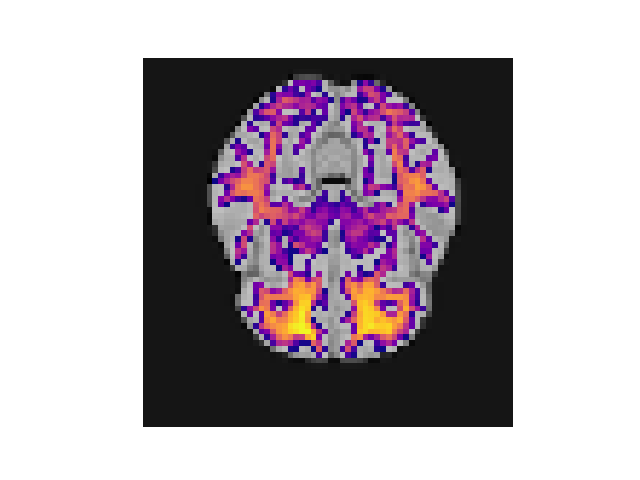

In [5]:
# imshow kwargs
imshow_opts = {
    "origin" : "lower",
    "interpolation" : "nearest"
}

# Axial slice of activation map overlay
plt.imshow(bg[...,10].T, cmap="gray");             # Background
plt.imshow(act[...,10].T, cmap="plasma");          # Activation map
plt.axis('off');

## Detecting gravitational wave signature of black hole and neutron star mergers

[PyCBC](https://pycbc.org/) is the toolkit used to analyze data from gravitational wave observatories like [LIGO](https://www.ligo.caltech.edu/) and [Virgo](http://www.virgo-gw.eu/).

The [PyCBC tutorials](https://github.com/gwastro/PyCBC-Tutorials) have some really cool examples - let's recreate the "chirp" from [first ever direct detection of gravitational waves](https://en.wikipedia.org/wiki/First_observation_of_gravitational_waves) that resulted from two black holes merging. For more info, see [the second PyCBC tutorial](https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/2_VisualizationSignalProcessing.ipynb).

In [6]:
import pycbc
from pycbc import catalog

merger_data = catalog.Merger('GW150914')
# Though the catalog includes data from multiple observatories,
# let's focus on just one
ligo_data = merger_data.strain('L1')
type(ligo_data)

pycbc.types.timeseries.TimeSeries

`pycbc` has its own (quite extensive) API that uses `numpy` and `scipy` under the hood

In [7]:
print(type(ligo_data._data))

<class 'pycbc.types.aligned.ArrayWithAligned'>


In [8]:
pycbc.types.aligned.ArrayWithAligned.__bases__

(numpy.ndarray,)

To re-create the "chirp" we have to do some analysis on the raw data. `pycbc` relies on tools in `scipy.fft` and `scipy.signal` to implement the frequency analysis.

In [11]:
# Flatten frequency 
res = ligo_data.whiten(4, 4)

In [12]:
time_of_merger = merger_data.time

# Look 100 msec-worth of data around the merger time
roi = res.time_slice(time_of_merger - 0.1, time_of_merger + 0.1)

# Similar to a spectrogram with more sophisticated, irregular sampling
times, freqs, power = roi.qtransform(
    delta_t=0.001,
    logfsteps=100,
    qrange=(8, 8),
    frange=(30, 512),
)

<IPython.core.display.Javascript object>


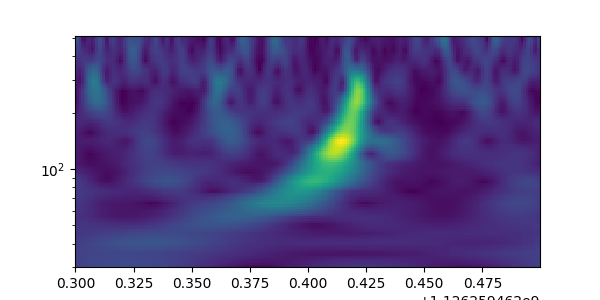

In [13]:
fig, ax = plt.subplots(figsize=(6,3))
ax.pcolormesh(times, freqs, power**0.5)
ax.set_yscale('log')

# Scope of NumPy

NumPy currently targets computation involving:

 * in-memory, homogenously-typed array data
 * cpu-based

Important guiding principles:
 - **Stability**: Foundational component of the scientific python ecosystem for going-on 15 years
 - **Interoperability**
   * NumPy is the standard array data structure within the scientific Python ecosystem
   * What about all the new array libraries?
     - [XArray](http://xarray.pydata.org/en/stable/)
     - [Dask Arrays](https://docs.dask.org/en/latest/array.html)
     - [Jax](https://jax.readthedocs.io/en/latest/)
     - [pydata sparse](https://sparse.pydata.org/en/latest/)
     - [PyTorch](https://pytorch.org/)
     - [TensorFlow](https://www.tensorflow.org/api_docs)

# The changing landscape

 - In the early days, many new NumPy users were converts from languages like Matlab and IDL
   * See the [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) article in the docs
   
 - **Now**: The scientific Python ecosystem (including data science and ML libraries) is incredibly feature-rich and powerful, and is attracting many new users.
   * Users interested in specific applications (machine learning, image processing, geoscience, bioinformatics, etc.) end up interacting with NumPy indirectly

## Google Trends

In [19]:
# Data downloaded from google trends
!ls data/*.csv

data/datascience.csv  data/matlab.csv  data/numpy.csv


In [20]:
!head data/datascience.csv

Category: All categories

Month,data science: (United States)
2004-01,18
2004-02,10
2004-03,11
2004-04,11
2004-05,6
2004-06,8
2004-07,10


In [24]:
timeseries_dtype = np.dtype([
    ('date', 'datetime64[M]'),
    ('relpop', float)
])

parse_kwargs = {
    "skiprows" : 3,
    "delimiter" : ",",
    "dtype" : timeseries_dtype
}

fnames = ("numpy", "datascience", "matlab")

data = {
    fname : np.loadtxt("data/{}.csv".format(fname), **parse_kwargs) for fname in fnames
}

<IPython.core.display.Javascript object>


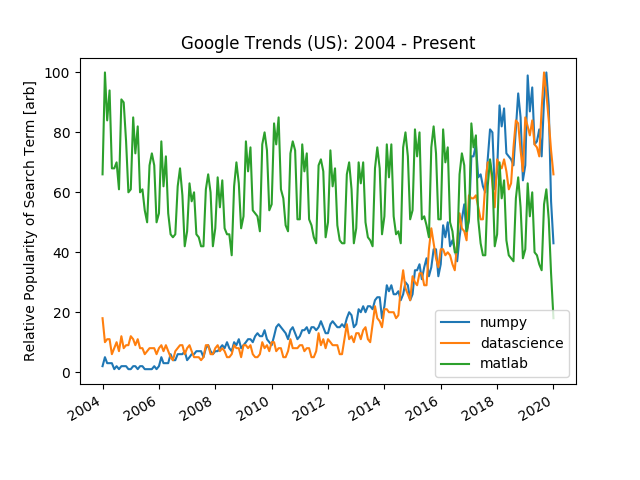

In [25]:
fig, ax = plt.subplots()
for name, vals in data.items():
    plt.plot(vals['date'], vals['relpop'], label=name)
ax.set_title('Google Trends (US): 2004 - Present')
ax.set_ylabel('Relative Popularity of Search Term [arb]')
fig.autofmt_xdate()
ax.legend();

<IPython.core.display.Javascript object>


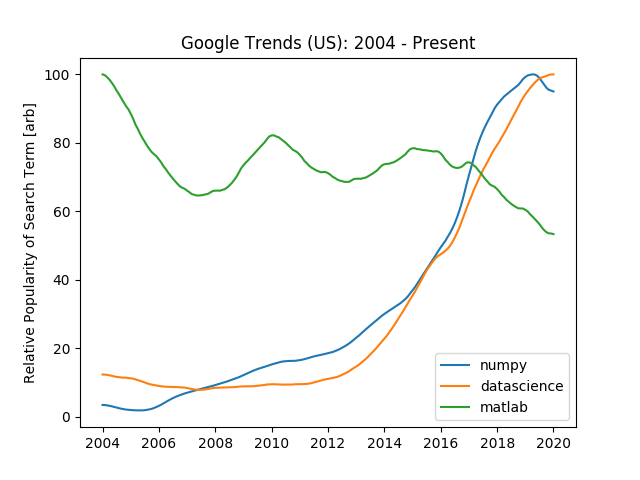

In [27]:
def smooth(s, kernsize=21):
    s_padded = np.r_[s[kernsize-1:0:-1], s, s[-2:-kernsize-1:-1]]
    kern = np.hamming(kernsize)
    res_padded = np.convolve(kern/kern.sum(), s_padded, mode='valid')
    # De-pad and renormalize
    return 100 * res_padded[kernsize//2:-kernsize//2+1] / res_padded.max()

fig, ax = plt.subplots()
for name, vals in data.items():
    plt.plot(vals['date'], smooth(vals['relpop']), label=name)
ax.set_title('Google Trends (US): 2004 - Present')
ax.set_ylabel('Relative Popularity of Search Term [arb]')
ax.legend();

# The changing landscape 
 * Focus resources on supporting stable, performant base for dependent libraries
   * Scope: what goes in NumPy itself vs. dependent packages?
   * Balance between performance and maintainability
     > Optimization is the altar where maintainability is sacrificed
     >
     > \- Luciano Ramalho, *Fluent Python*

# How is NumPy Developed

 - Collaboratively (caveat here about the bus factor)

Commitment to stability means proposed changes must go through extensive design and review:
 - [Numpy Enhancement Proposals (NEPs)](https://numpy.org/neps/) - analogous to PEPs, specific to NumPy
 - Steering council for high-level direction and coordination with [NumFOCUS](https://numfocus.org/)

# Case-Study: `np.random`
 - Changes proposed in [NEP 19](https://numpy.org/neps/nep-0019-rng-policy.html), subsequently "approved" by the community after discussion on the mailing list.
 - Overhaul of `np.random` landed in version 1.17
 
   * Improve *performance* and *flexibility* without sacrificing stability

In [28]:
# Generate 1,000,000 random numbers the old way
old_rands = np.random.random(int(1e6))
print("Uniform random numbers from legacy np.random.random:\n  {}".format(old_rands))

Uniform random numbers from legacy np.random.random:
  [0.53842465 0.97946477 0.82394071 ... 0.71119981 0.77571282 0.35843423]


In [29]:
# ... and the new way
from numpy.random import PCG64, Generator
rg = Generator(PCG64())
new_rands = rg.random(int(1e6))
print("Uniform random numbers with new tools:\n  {}".format(new_rands))

Uniform random numbers with new tools:
  [0.1220858  0.00500507 0.40694477 ... 0.96457464 0.03574082 0.44480831]


## Compatibility

Before version 1.17, `numpy.random` relied on `RandomState` to configure and produce random numbers.

There are many, many LOC (both in test suites and in production) that depend on the original `numpy.random`, so both the *interface* and the *results* must remain unchanged
 * <font color="green">**Upside: Stability**</font> - output of `np.random` remains consistent with all previous versions
 * <font color="orange">**Downside: Discoverability**</font> - users need to know about new interface to access improvements

In [30]:
# Choose a seed for generator
seed = 1817

# Random numbers generated by np.random in v1.15
rands_from_v1_15 = np.load('data/npy_v1.15_random_seed1817_1000samples.npy')
# Generate random numbers with legacy interface
np.random.seed(seed)
legacy_rands = np.random.random(1000)

print("Arrays equivalent: ", np.allclose(rands_from_v1_15, legacy_rands))

Arrays equivalent:  True


It is possible (though clunky) to replicate legacy behavior with new interface

In [37]:
seed = 1817

from numpy.random import MT19937, RandomState
# Set random state with legacy seeding
rs = RandomState(seed)
mt = MT19937()
mt.state = rs.get_state()

# New interface for generation
rg = Generator(mt)
mt_rands = rg.random(1000)
print("Legacy: {}\nGenerator: {}".format(legacy_rands[:4], mt_rands[:4]))
print("Arrays equivalent: ", np.allclose(legacy_rands, mt_rands))

Legacy: [0.82110899 0.62606521 0.15908807 0.56219788]
Generator: [0.82110899 0.62606521 0.15908807 0.56219788]
Arrays equivalent:  True


## Performance

The [PCG64](https://docs.scipy.org/doc/numpy/reference/random/bit_generators/pcg64.html) BitGenerator is a 
[significant improvment](http://www.pcg-random.org/) over the legacy Marsenne Twister in many areas, including speed:



In [39]:
#NOTE: PCG64 is the new default bit_generator, so default_rng() equivalent to Generator(PCG64())
from numpy.random import default_rng
rg = default_rng()
num_samples = int(1e5)

print("Uniform random numbers:")
%timeit np.random.random(num_samples)
%timeit rg.random(num_samples)

Uniform random numbers:
519 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
317 µs ± 376 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In addition, `Generator` includes improved methods for drawing samples from distributions.

In [40]:
print("Standard Normal:")
%timeit np.random.standard_normal(num_samples)
%timeit rg.standard_normal(num_samples)

Standard Normal:
2.35 ms ± 84.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
988 µs ± 9.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
print("Standard Exponential:")
%timeit np.random.standard_exponential(num_samples)
%timeit rg.standard_exponential(num_samples)

Standard Exponential:
1.82 ms ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
512 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
print("Standard Gamma:")
shape_param = 3.0
%timeit np.random.standard_gamma(shape_param, num_samples)
%timeit rg.standard_gamma(shape_param, num_samples)

Standard Gamma:
3.62 ms ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.08 ms ± 55.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# What's next for NumPy?

![NumpyRoadmapGraphic](./images/numpy_roadmap_graphic.png)

Image from [this PyData Amsterdam 2019 presentation](https://www.slideshare.net/RalfGommers/the-evolution-of-array-computing-in-python/14) by [Ralf Gommers](https://github.com/rgommers)

## Interoperability

Separate NumPy API from NumPy "execution engine"
 - Allow other libraries ([Dask](https://dask.org/), [CuPy](https://cupy.chainer.org/), [PyTorch](https://pytorch.org/)) to reuse NumPy API
 - Mitigate ecosystem fragmentation
   * E.g. don't want a re-implementation of `scipy` for each ML framework (`pytorch.scipy`, `tensorflow.scipy`, etc.)



### Current n-dimensional array landscape

![arrays_now](images/array_landscape_now.png)

Images from this [talk at PyData NY 2019](https://www.slideshare.net/RalfGommers/pydata-nyc-whatsnew-numpyscipy-2019?next_slideshow=1) by [Ralf Gommers](https://github.com/rgommers)

### Vision for the future

![array_vision](images/array_landscape_vision.png)

Images from this [talk at PyData NY 2019](https://www.slideshare.net/RalfGommers/pydata-nyc-whatsnew-numpyscipy-2019?next_slideshow=1) by [Ralf Gommers](https://github.com/rgommers)

## First solution: `__array_function__` protocol

 - Proposed in [NEP 18](https://numpy.org/neps/nep-0018-array-function-protocol.html)
 - Array function protocol enabled by default as of version 1.17
 
![array_function_protocol](images/array_function_descr.png)
 
Image source: [this presentation](https://www.slideshare.net/RalfGommers/arrayfunction-conceptual-design-related-concepts?from_action=save) by [Ralf Gommers](https://github.com/rgommers)

### `__array_function__` example

In [43]:
import numpy as np

rg = np.random.default_rng()
x = rg.random((5000, 1000))

# Factorize with np.linalg
q, r = np.linalg.qr(x)
type(r)

numpy.ndarray

In [44]:
import dask.array as da

d = da.from_array(x, chunks=(1000, 1000))

# Same call signature!
q, r = np.linalg.qr(d)
type(d)

dask.array.core.Array

In [45]:
da.core.Array??

## Lessons learned from `__array_function__`

 - The `__array_function__` protocol has been partially successful, but has fallen short of universal adoption.
 - Valuable feedback from the community has resulted in [NEP 37](https://numpy.org/neps/nep-0037-array-module.html)
   * Defines `__array_module__` protocol
   * Currently under development (interested?)

## Overhaul of the data type system

NumPy relies on dtypes to describe how to interpret array elements. In principal, the NumPy C-API allows for user-defined dtypes, but some components of the dtype machinery (e.g. some logic for casting rules) is not extensible by user-defined types.

A [NEP is currently being drafted](https://github.com/numpy/numpy/blob/a111b551ae940d7d5f8523fef1cf3589c6ba00a0/doc/neps/nep-0033-extensible-dtypes.rst) to improve the extensibility of the dtype system. Some of the impetus for this work comes from the ML community, such as the desire for `bfloat16` and categorical types.

## Improved SIMD incorporation for `ufuncs`

Strike a balance between **optimization** and **maintainability**

 - Define set of architecture-agnostic universal intrinsics
   * At build time, build code paths based on features available for the host architecture
   * At run time, detect which features are available and select which of available code paths to use
 - In the process of being formalized in a [draft NEP](https://github.com/mattip/numpy/blob/nep_simd/doc/neps/nep-XXXX-SIMD-optimizations.rst)
   * Preliminary work in support of this proposed enhancment can be found [here](https://github.com/numpy/numpy/pull/13421/files) and [here](https://github.com/numpy/numpy/pull/13516)

## Slides on indexing?

## Supporting language features: type annotations

Thinking about how best to support type annotations became especially important when they became an official core language feature in Python 3.7.

Work on type annotations is located in the [numpy-stubs](https://github.com/numpy/numpy-stubs) repository. Basic type annotations are supported. Here's the contents of `type_annotations.py`:

```python
import numpy as np

def my_strict_sin(x: np.ndarray) -> np.ndarray:
    return np.sin(x)

def my_chill_sin(x: np.array_like) -> np.array_like:
    return np.sin(x)

if __name__ == "__main__":
    a = np.arange(10)
    l = [1, 2, 3]
    my_strict_sin(a)     # Passes typecheck
    my_strict_sin(l)     # Fails typecheck
    my_chill_sin(a)      # Passes typecheck
    my_chill_sin(l)      # Passes typecheck
```

In [46]:
!mypy type_annotations.py

type_annotations.py:13: error: Argument 1 to "my_strict_sin" has incompatible type "List[int]"; expected "ndarray"
Found 1 error in 1 file (checked 1 source file)


# Beyond the horizon... NumPy 2.0?

 - Major revision -> opportunity for refactoring/enhancements that break API
   * Weigh potential for improvements against the pain of breaking changes (example: Python2 -> Python3)
 - So much new functionality being developed in external libraries
   * Changes that facilitate external development are priorities
 
A bit of the history surrounding the idea of NumPy 2.0 can be found [here](https://github.com/numpy/numpy/issues/9066)

# Getting involved

NumPy presents an opportunity to work on a project that is depended on by tens of millions of users (and counting). Here's how you can get involved:
 1. Contribute
   - [GitHub Issues](https://github.com/numpy/numpy/issues) and [open PRs](https://github.com/numpy/numpy/pulls) are a great entry point
     * If you want to get your hands dirty immediately, try starting with the [good first issue](https://github.com/numpy/numpy/issues?q=is%3Aopen+is%3Aissue+label%3A%22good+first+issue%22) label
     * For challenges with a greater scope, try the [Enhancement](https://github.com/numpy/numpy/labels/01%20-%20Enhancement) or [Wish List](https://github.com/numpy/numpy/labels/23%20-%20Wish%20List) labels
   - Check out the discussion revolving around accepted and proposed [NEPs](https://numpy.org/neps/)
 2. Participate in the conversation
  - [Numpy discussion mailing list](https://www.scipy.org/scipylib/mailing-lists.html)
  - Numpy community meetings (links and cadence here)
  - slack channel